In [0]:
import numpy as np
import pandas as pd
import io
from google.colab import files

In [5]:
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['matches.csv'].decode('utf-8')))
df

KeyError: ignored

In [0]:
# Q1 : Find the name of the player who won max number of man of the matches award in the period of 2010 and 2015 while plating in Mumbai [Easy]
mask1=df['season']>=2010
mask2=df['season']<=2015
mask3=df['city']=='Mumbai'
k=df[mask1 & mask2 & mask3]

d=k['player_of_match'].value_counts()

m=max(d)
t=d.index[d.values==m]
print("the maximum no of man of the matches goes to:",t[0])




the maximum no of man of the matches goes to: KA Pollard


In [0]:
# Q2 : Find the team who has won most number of matches with victory margin > 50 [Easy]
mask1=df['win_by_runs']>50
k=df[mask1]

d=k["winner"].value_counts()
m=max(d)
t=d.index[d.values==m]
print("the winning team:",t[0])



the winning team: Chennai Super Kings


In [0]:
# Q3 : Write a function which will take 2 inputs, team 1 and team 2 and their record against each other

# For example if team1->KKR and team2->CSK

# The output should be like KKR 2(matches won by KKR) and CSK 5(matches won by CSK)[Medium]
def records(team1,team2):
  c=0
  mask1=df['team1']==team1
  mask2=df['team2']==team2
  mask3=df['team1']==team2
  mask4=df['team2']==team1
  newdata=df[(mask1 & mask2) | (mask3 & mask4)]
  
  check=newdata.shape[0]
  newseries=newdata["winner"].value_counts()
  for i in range(len(newseries)):
    c=c+int(newseries.values[i])
  if c==check:  
    if(len(newseries)==1):
      if team1 in newseries:
        print("{} won {} matches and {} won {} matches".format(newseries.index[0],newseries.values[0],team2,'0'))
      else:
        print("{} won {} matches and {} won {} matches".format(newseries.index[0],newseries.values[0],team1,'0'))
    else:    
     print("{} won {} matches and {} won {} matches".format(newseries.index[0],newseries.values[0],newseries.index[1],newseries.values[1]))
  else:
    if(len(newseries)==1):
     if team1 in newseries:
       print("{} won {} matches , {} won {} matches and {} unrecorded match".format(newseries.index[0],newseries.values[0],team2,'0',int(check-c)))
     else:
        print("{} won {} matches , {} won {} matches and {} unrecorded match".format(newseries.index[0],newseries.values[0],team1,'0',int(check-c)))
    else:    
     print("{} won {} matches , {} won {} matches and {} unrecorded match ".format(newseries.index[0],newseries.values[0],newseries.index[1],newseries.values[1],int(check-c)))  
records('Kolkata Knight Riders','Royal Challengers Bangalore')  

Kolkata Knight Riders won 11 matches and Royal Challengers Bangalore won 9 matches


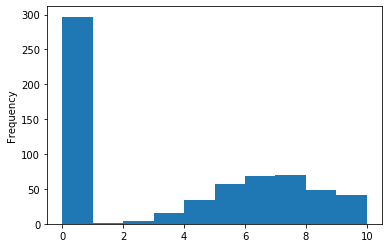

In [0]:
# Q4 : Plot a bar graph on win_by_wickets col. [Easy]
import matplotlib.pyplot as plt
df['win_by_wickets'].plot(kind='hist')

In [0]:
# Q5 : Write a function which will accept a team name as input and will return it's win percentage after winning the toss[Difficult] 
def win_percent(team):
  mask=df['toss_winner']==team
  newdata=df[mask]

  total_wins=newdata.shape[0]
  mask2=newdata['winner']==team
  newdata2=newdata[mask2]
  win=newdata2.shape[0]
  return("win percent=",((win*100)/total_wins))
print(win_percent("Rising Pune Supergiants"))  

('win percent=', 42.857142857142854)


In [2]:
  import pandas as pd
  mask=df['city']=='Mumbai'
  df[mask].groupby('season').size()

NameError: ignored